## MLP predict next token (character level here)

>Every word/char embedded in a _N_ dimensional space, at the beginning they are randomly spreading out in the embedding space

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:

block_size = 3 # context length: how many chars do we take to predict the next one
X, Y = [], []
for w in words:
    print(w)
    
    context = [0]* block_size
    for ch in w+'.':
        idx = stoi[ch]
        X.append(context)
        Y.append(idx)
#         print(''.join(itos[i] for i in context), '--->', ch)
        context = context[1:] + [idx]

X = torch.tensor(X)
Y = torch.tensor(Y)
print(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.rand((27, 2)) # 2 dimentional embedding

In [8]:
C[5] # (1) indexing embedding table

tensor([0.1760, 0.6628])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # (2) interpreted as first layer of the NN, C is weight matrix

tensor([0.1760, 0.6628])

In [10]:
C[X].shape

torch.Size([228146, 3, 2])

In [11]:
C[1]

tensor([0.2267, 0.2068])

In [12]:
X[13,2]

tensor(1)

In [13]:
C[X][13,2]

tensor([0.2267, 0.2068])

In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
#First hiddne layer
l1_n = 100  #neurons
W1 = torch.randn((6, l1_n))
b1 = torch.randn(100)

In [23]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [24]:
C

tensor([[0.6858, 0.0460],
        [0.0879, 0.9234],
        [0.5761, 0.4226],
        [0.9315, 0.6865],
        [0.7045, 0.1722],
        [0.6007, 0.6342],
        [0.3825, 0.1155],
        [0.2138, 0.6569],
        [0.2983, 0.7385],
        [0.7847, 0.6525],
        [0.6903, 0.8476],
        [0.8510, 0.3378],
        [0.7139, 0.9733],
        [0.9021, 0.7232],
        [0.6407, 0.2700],
        [0.4194, 0.0986],
        [0.0619, 0.5863],
        [0.4009, 0.2877],
        [0.6743, 0.2067],
        [0.1311, 0.8162],
        [0.9911, 0.6596],
        [0.0220, 0.5724],
        [0.2198, 0.3964],
        [0.1923, 0.0251],
        [0.3409, 0.3555],
        [0.1270, 0.2455],
        [0.6999, 0.5329]])

In [26]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], 1) # method 1

tensor([[0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6007, 0.6342],
        [0.6858, 0.0460, 0.6007, 0.6342, 0.9021, 0.7232],
        [0.6007, 0.6342, 0.9021, 0.7232, 0.9021, 0.7232],
        [0.9021, 0.7232, 0.9021, 0.7232, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.4194, 0.0986],
        [0.6858, 0.0460, 0.4194, 0.0986, 0.7139, 0.9733],
        [0.4194, 0.0986, 0.7139, 0.9733, 0.7847, 0.6525],
        [0.7139, 0.9733, 0.7847, 0.6525, 0.2198, 0.3964],
        [0.7847, 0.6525, 0.2198, 0.3964, 0.7847, 0.6525],
        [0.2198, 0.3964, 0.7847, 0.6525, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.0879, 0.9234, 0.2198, 0.3964],
        [0.0879, 0.9234, 0.2198, 0.3964, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.685

In [28]:
torch.cat(torch.unbind(emb, 1), 1)   # method 2 (create a new torch, more memory allcation)

tensor([[0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6007, 0.6342],
        [0.6858, 0.0460, 0.6007, 0.6342, 0.9021, 0.7232],
        [0.6007, 0.6342, 0.9021, 0.7232, 0.9021, 0.7232],
        [0.9021, 0.7232, 0.9021, 0.7232, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.4194, 0.0986],
        [0.6858, 0.0460, 0.4194, 0.0986, 0.7139, 0.9733],
        [0.4194, 0.0986, 0.7139, 0.9733, 0.7847, 0.6525],
        [0.7139, 0.9733, 0.7847, 0.6525, 0.2198, 0.3964],
        [0.7847, 0.6525, 0.2198, 0.3964, 0.7847, 0.6525],
        [0.2198, 0.3964, 0.7847, 0.6525, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.0879, 0.9234, 0.2198, 0.3964],
        [0.0879, 0.9234, 0.2198, 0.3964, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.685

In [30]:
emb.view(32,6)  #method 3

tensor([[0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6007, 0.6342],
        [0.6858, 0.0460, 0.6007, 0.6342, 0.9021, 0.7232],
        [0.6007, 0.6342, 0.9021, 0.7232, 0.9021, 0.7232],
        [0.9021, 0.7232, 0.9021, 0.7232, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.4194, 0.0986],
        [0.6858, 0.0460, 0.4194, 0.0986, 0.7139, 0.9733],
        [0.4194, 0.0986, 0.7139, 0.9733, 0.7847, 0.6525],
        [0.7139, 0.9733, 0.7847, 0.6525, 0.2198, 0.3964],
        [0.7847, 0.6525, 0.2198, 0.3964, 0.7847, 0.6525],
        [0.2198, 0.3964, 0.7847, 0.6525, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.0879, 0.9234, 0.2198, 0.3964],
        [0.0879, 0.9234, 0.2198, 0.3964, 0.0879, 0.9234],
        [0.6858, 0.0460, 0.6858, 0.0460, 0.6858, 0.0460],
        [0.685

In [16]:
h = torch.tanh( emb.view(-1,6) @ W1 + b1)

In [17]:
h.shape

torch.Size([228146, 100])

In [18]:
# Second/Final layer
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [19]:
logits = h @ W2 +b2

In [20]:
logits.shape

torch.Size([228146, 27])

In [21]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)

In [22]:
prob.shape

torch.Size([228146, 27])

In [23]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [24]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [62]:

g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 2), generator = g) # 2 dimentional embedding
#Hidden Layer 
l1_n = 100
W1 = torch.randn((6, l1_n), generator = g)
b1 = torch.randn(l1_n, generator = g)
# Second/Final layer
W2 = torch.randn((l1_n, 27), generator = g)
b2 = torch.randn(27, generator = g)

parameters = [C, W1, b1, W2, b2]

In [63]:
sum(p.nelement() for p in parameters) #number of parameters in total

3481

In [64]:
for p in parameters:
    p.requires_grad = True

In [29]:
for _ in range(100):

    #Forward Pass
    emb = C[X]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

2.91707181930542
2.920905351638794
2.916623115539551
2.91916823387146
2.9159421920776367
2.917470932006836
2.9149255752563477
2.9156856536865234
2.9135138988494873
2.9137051105499268
2.9117050170898438
2.9115114212036133
2.9095633029937744
2.909111976623535
2.907160758972168
2.9065656661987305
2.9045886993408203
2.903920888900757
2.901892900466919
2.901221752166748
2.8991453647613525
2.898529052734375
2.8963823318481445
2.895866870880127
2.893620014190674
2.8932571411132812
2.890892267227173
2.890718460083008
2.888197422027588
2.888258218765259
2.885554552078247
2.8858861923217773
2.882962942123413
2.8836052417755127
2.8804242610931396
2.8814125061035156
2.877946615219116
2.8793249130249023
2.87552547454834
2.8773348331451416
2.87317156791687
2.87544846534729
2.8708813190460205
2.8736696243286133
2.8686606884002686
2.872008800506592
2.8665201663970947
2.870468854904175
2.8644649982452393
2.869058132171631
2.8625009059906006
2.8677775859832764
2.8606412410736084
2.866636276245117
2.8589

In [30]:
# torch.randint(0, 5, (32,))
X.shape[0]

228146

In [59]:
lre = torch.linspace(-3, 0 , 1000)
lrs = 10**lre                           #learning rates

In [60]:
lri = []
lossi = []

#Minibatch

for i in range(1000):

    
    idx = torch.randint(0, X.shape[0], (32,))
    
    #Forward Pass
    emb = C[X[idx]]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y[idx])
    print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    lri.append(lre[i])
    lossi.append(loss.item())
    
print(loss.item())

13.294302940368652
11.501753807067871
9.790260314941406
11.325753211975098
11.316778182983398
10.342665672302246
10.01916790008545
10.178316116333008
11.414838790893555
11.974093437194824
10.714723587036133
10.619685173034668
11.387670516967773
10.211040496826172
10.907613754272461
10.787482261657715
10.252744674682617
8.509784698486328
11.167102813720703
11.039073944091797
11.219754219055176
10.969547271728516
9.264219284057617
10.144118309020996
8.44335651397705
10.638954162597656
9.242253303527832
11.982808113098145
11.814967155456543
9.810771942138672
9.314981460571289
10.4600830078125
11.40324878692627
9.082846641540527
9.612435340881348
9.955081939697266
11.116632461547852
10.52380657196045
12.110782623291016
9.804876327514648
10.85402774810791
10.712035179138184
10.850860595703125
9.181561470031738
10.021550178527832
9.190352439880371
9.704991340637207
7.036221027374268
10.7761869430542
8.492819786071777
9.417357444763184
9.803661346435547
9.943653106689453
9.194090843200684
8.8

6.787519454956055
8.22623348236084
9.525246620178223
10.777904510498047
10.149913787841797
7.952075481414795
7.176074028015137
8.608942985534668
6.81300163269043
5.727015495300293
4.787339687347412
8.792228698730469
8.98112678527832
8.09648323059082
9.850339889526367
7.332401275634766
5.607120513916016
6.559676647186279
5.292298316955566
6.292204856872559
5.929937362670898
5.620754718780518
4.950399398803711
6.735321521759033
5.400694370269775
5.57649564743042
5.833703994750977
5.940759658813477
7.269356727600098
5.6405415534973145
4.921863079071045
5.169887542724609
9.649397850036621
8.861307144165039
6.963709831237793
8.185588836669922
4.588559627532959
7.529329299926758
5.614493370056152
6.234406471252441
7.667276859283447
5.348696708679199
8.602334022521973
8.49637222290039
6.8688483238220215
5.41123104095459
6.735301971435547
6.240533351898193
7.140179634094238
5.411510467529297
6.893224716186523
4.9216227531433105
5.179078102111816
5.822331428527832
5.922306060791016
6.7402420043

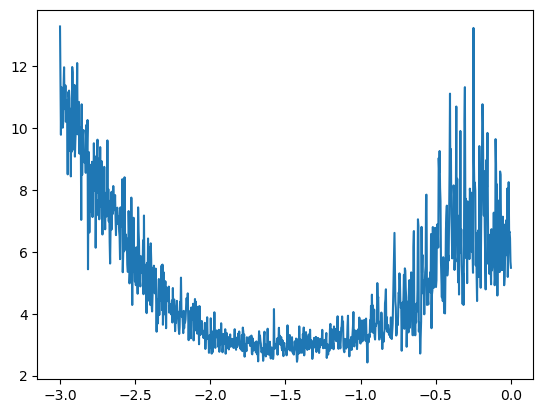

In [61]:
plt.plot(lri, lossi)

In [72]:
#Minibatch

for i in range(10000):

    
    idx = torch.randint(0, X.shape[0], (32,))
    
    #Forward Pass
    emb = C[X[idx]]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y[idx])
#     print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 10**-1.5
    for p in parameters:
        p.data += -lr * p.grad
        
    
print(loss.item())

2.4206128120422363


In [73]:
emb = C[X]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y)
loss
#Better than Bigram

tensor(2.4330, grad_fn=<NllLossBackward0>)

### Learning Rate Decay when reaching the plateau
Recude the ```lr``` from $10^{-1.5}$ to $10^{-2}$

In [76]:
#Learning Rate Decay when reaching the platau

for i in range(10000):

    #Minibatch construction, batch size = 32
    idx = torch.randint(0, X.shape[0], (32,))
    
    #Forward Pass
    emb = C[X[idx]]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y[idx])
#     print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 10**-2  #Learning Rate Decay when reaching the platau
    for p in parameters:
        p.data += -lr * p.grad
        
    
print(loss.item())

2.3003551959991455


In [77]:
emb = C[X]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y)
loss
#Better than Bigram in a sense. Yet pay attention to the overfitting

tensor(2.3962, grad_fn=<NllLossBackward0>)

### Training Split, Validation Split, Test split
#80%(Train the parameters including Weights and Biases), 10% (Hyperparameter training, including hidden layer size, embedding size), 10% (Evaluate the performance of the model)

In [80]:
# build dataset
def build_dataset(words):
    block_size = 3 # context length: how many chars do we take to predict the next one
    X, Y = [], []
    for w in words:
#         print(w)

        context = [0]* block_size
        for ch in w+'.':
            idx = stoi[ch]
            X.append(context)
            Y.append(idx)
    #         print(''.join(itos[i] for i in context), '--->', ch)
            context = context[1:] + [idx]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [81]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train, Y_train = build_dataset(words[:n1])
X_eval, Y_eval = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [82]:
# Initialize the parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 2), generator = g) # 2 dimentional embedding
#Hidden Layer 
l1_n = 100
W1 = torch.randn((6, l1_n), generator = g)
b1 = torch.randn(l1_n, generator = g)
# Second/Final layer
W2 = torch.randn((l1_n, 27), generator = g)
b2 = torch.randn(27, generator = g)

parameters = [C, W1, b1, W2, b2]

In [83]:
sum(p.nelement() for p in parameters) #number of parameters in total


3481

In [84]:
for p in parameters:
    p.requires_grad = True

In [89]:
#Minibatch with Training 

for i in range(10000):

    
    idx = torch.randint(0, X_train.shape[0], (32,))
    
    #Forward Pass
    emb = C[X_train[idx]]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y_train[idx])
#     print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 10**-2
    for p in parameters:
        p.data += -lr * p.grad
        
    
print(loss.item())

2.555142879486084


In [90]:
emb = C[X_eval]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_eval)
loss

tensor(2.3827, grad_fn=<NllLossBackward0>)

In [91]:
emb = C[X_train]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.3853, grad_fn=<NllLossBackward0>)

Underfitting, as the training loss is roughly equal to eval loss
#### So next, we increase the layer size and embedding size

In [93]:
# Initialize the parameters
emb_dim = 2
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, emb_dim), generator = g) # 2 dimentional embedding
#Hidden Layer 
l1_n = 300
W1 = torch.randn((6, l1_n), generator = g)
b1 = torch.randn(l1_n, generator = g)
# Second/Final layer
W2 = torch.randn((l1_n, 27), generator = g)
b2 = torch.randn(27, generator = g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [117]:
#Minibatch with Training 
stepi = []
lossi = []
for i in range(30000):

    
    idx = torch.randint(0, X_train.shape[0], (32,))
    
    #Forward Pass
    emb = C[X_train[idx]]  #(32, 3, 2)
    h = torch.tanh( emb.view(-1,6) @ W1 + b1) 
    logits = h @ W2 +b2
    # Inefficient as the following steps creating new tensors
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims = True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    loss = F.cross_entropy(logits, Y_train[idx])
#     print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 10**-3
    for p in parameters:
        p.data += -lr * p.grad
        
    stepi.append(i)
    lossi.append(loss.item())
print(loss.item())

2.2848520278930664


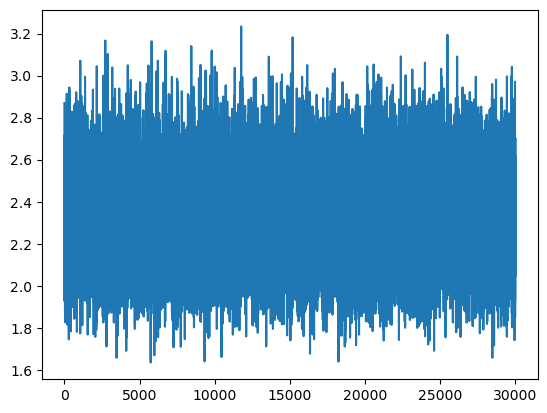

In [114]:
plt.plot(stepi, lossi)

In [118]:
emb = C[X_train]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) 
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.3306, grad_fn=<NllLossBackward0>)

In [119]:
emb = C[X_eval]
h = torch.tanh( emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_eval)
loss

tensor(2.3320, grad_fn=<NllLossBackward0>)

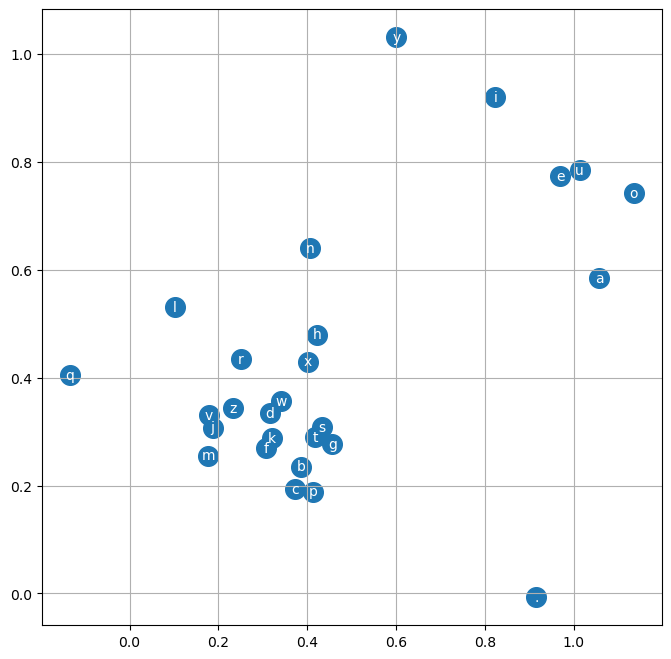

In [121]:
plt.figure(figsize =(8,8))
plt.scatter(C[:, 0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color ='white')
plt.grid('minor')

In [188]:
# Initialize the parameters
emb_dim = 30
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, emb_dim), generator = g) # 2 dimentional embedding
#Hidden Layer 
l1_n = 300
W1 = torch.randn((block_size*emb_dim, l1_n), generator = g)
b1 = torch.randn(l1_n, generator = g)
# Second/Final layer
W2 = torch.randn((l1_n, 27), generator = g)
b2 = torch.randn(27, generator = g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [189]:
sum(p.nelement() for p in parameters)

36237

In [190]:
stepi = []
lossi = []

In [191]:
#Minibatch with Training 

for i in range(200000):

    
    idx = torch.randint(0, X_train.shape[0], (32,))
    
    #Forward Pass
    emb = C[X_train[idx]]  
    h = torch.tanh( emb.view(-1,block_size*emb_dim) @ W1 + b1) 
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y_train[idx])
#     print(loss.item())
    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = 10**-2 if i > 100000 else 10**-1
    for p in parameters:
        p.data += -lr * p.grad
        
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.5829176902770996


In [192]:
len(stepi)

200000

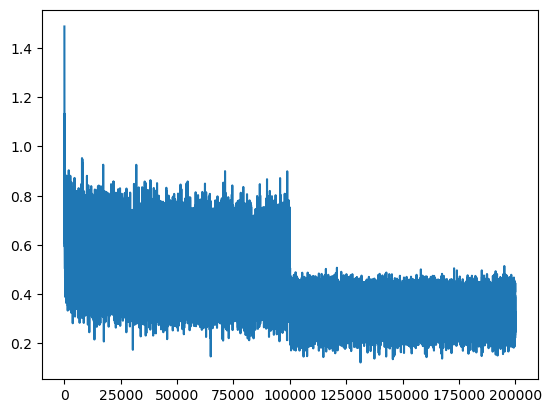

In [193]:
plt.plot(stepi, lossi)

In [194]:
emb = C[X_train]
h = torch.tanh( emb.view(-1,block_size*emb_dim) @ W1 + b1) 
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.1681, grad_fn=<NllLossBackward0>)

In [195]:
emb = C[X_eval]
h = torch.tanh( emb.view(-1,block_size*emb_dim) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y_eval)
loss

tensor(2.1986, grad_fn=<NllLossBackward0>)

In [204]:
g = torch.Generator().manual_seed(2147483647+10)

for _ in range(20):

    out = []
    context = [0] *block_size
    while True:
        emb = C[torch.tensor([context])]
        print(C.shape)
        h = torch.tanh( emb.view(1,-1) @ W1 + b1) 
        logits = h @ W2 +b2
        probs = F.softmax(logits, dim=1)
        idx = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [idx]
        out.append(itos[idx])
#         print(idx)
        if idx == 0:
            break
    print(''.join(out))

torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
mora.
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
kayah.
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
keel.
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
nihayah.
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
rensracekgraem.
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size([27, 30])
torch.Size(